## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [12]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"

In [13]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [14]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

In [15]:
import pandas as pd

arrange_data =[]
with open("data/example.txt", 'r') as file:
    for line in file:
        line = line.replace('\n','').split(',')
        arrange_data.append(line)
    
df = pd.DataFrame(arrange_data)
df.head()

,0,1,2,3
0,id,sex,age,score
1,001,F,20,77
2,002,F,25,90
3,003,M,22,80
4,004,F,30,66


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

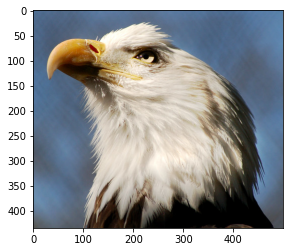

In [16]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import re

# 請用 df.loc[...] 得到第一筆資料的連結

for i in range(len(data)):
    data1 = ''.join(data[i])
    data[i] = re.split(r'\t+',data1)

#print(data[0])
df = pd.DataFrame(data)

first_link = df.iloc[0][1]
response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [19]:
def img2arr_fromURLs(url_list, resize = False):
    
    img_list=[]
    for url in url_list:
        response = requests.get(url)
        try:
            img = Image.open(BytesIO(response.content))
            img_list.append(img)
        except:
            #print("%s URL connect fail" % url)
            print('{} invalidation URL'.format(url))
            
    return img_list

http://img100.imageshack.us/img100/3253/forrest004fs9.jpg invalidation URL
Total images that we got: 4 


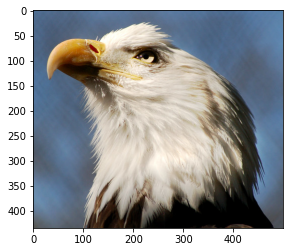

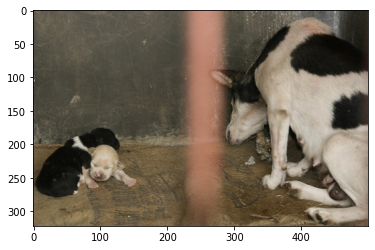

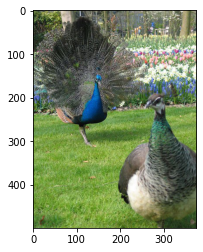

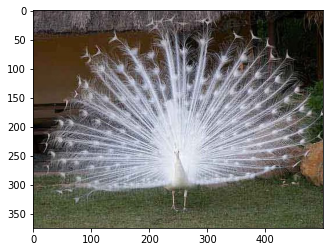

In [20]:
result = img2arr_fromURLs(df[0:5][1].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()